## make the dataset for training growth rate

In [10]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import h5py
import random

import sys
sys.path.append('../../../src')
from viz import show_images
from PlumeDataset import plume_dataset
from AutoAlign import align_plumes
from Velocity import VelocityCalculator
from PlumeMetrics import PlumeMetrics

sys.path.append('../../../src/DL')
from make_dataset import EqualRangeNormalizer, merge_h5_and_csv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## YG045-YG063

### load the csv file for plume metrics and growth conditions

#### some draft codes to work as one complete dataframe

In [15]:
df_plume_all = []
for file in glob.glob('../../../datasets/SRO_plume_metrics/*_metrics_with_conditions.csv'):
    print(file)
    df = pd.read_csv(file, index_col=0)
    df_plume_all.append(df)
df_plume_all = pd.concat(df_plume_all, ignore_index=True)
df_plume_all

../../../datasets/SRO_plume_metrics\YG045_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG046_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG047_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG048_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG049_metrics_with_conditions.csv


C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)


../../../datasets/SRO_plume_metrics\YG050_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG051_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG052_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG053_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG054_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG055_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG056_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG057_metrics_with_conditions.csv


C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)
C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)
C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)


../../../datasets/SRO_plume_metrics\YG058_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG059_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG060_metrics_with_conditions.csv


C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)
C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)


../../../datasets/SRO_plume_metrics\YG061_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG062_metrics_with_conditions.csv
../../../datasets/SRO_plume_metrics\YG063_metrics_with_conditions.csv


C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)
C:\Users\yig319\AppData\Local\Temp\ipykernel_6276\407608648.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)


,plume_index,time_index,Distance,Velocity,Area,Threshold,Growth,Pressure (mTorr),Temperature (C),Fluence (J/cm2),Repetation rate (Hz)
0,0,0,0,0.0,0.0,5,YG045,75.0,700,1.692857,10.0
1,0,1,0,0.0,0.0,5,YG045,75.0,700,1.692857,10.0
2,0,2,172,344000000.0,13911.0,5,YG045,75.0,700,1.692857,10.0
3,0,3,172,0.0,12170.0,5,YG045,75.0,700,1.692857,10.0
4,0,4,191,38000000.0,22390.0,5,YG045,75.0,700,1.692857,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1871611,379,123,18,0.0,0.0,flexible,YG063,100.0,700,1.600000,5.0
1871612,379,124,18,0.0,0.0,flexible,YG063,100.0,700,1.600000,5.0
1871613,379,125,18,0.0,0.0,flexible,YG063,100.0,700,1.600000,5.0
1871614,379,126,18,0.0,0.0,flexible,YG063,100.0,700,1.600000,5.0


In [77]:
df_plume_all['Threshold'] = df_plume_all['Threshold'].astype(str)

In [79]:
df_plume_all.to_csv('../../../datasets/SRO_plume_metrics/YG045_YG063-all_metrics_with_conditions.csv')

In [80]:
# Function to pivot a single column
def pivot_column(df, value_col):
    pivoted = df.pivot_table(
        values=value_col,
        index=['Growth', 'plume_index', 'time_index', 'Pressure (mTorr)', 
               'Temperature (C)', 'Fluence (J/cm2)', 'Repetation rate (Hz)'],
        columns='Threshold',
        aggfunc='first'
    )
    pivoted.columns = [f'{value_col}({col})' for col in pivoted.columns]
    return pivoted

# Pivot each column separately
area_pivoted = pivot_column(df_plume_all, 'Area')
area_pivoted
distance_pivoted = pivot_column(df_plume_all, 'Distance')
distance_pivoted
velocity_pivoted = pivot_column(df_plume_all, 'Velocity')
velocity_pivoted

# Combine all pivoted dataframes
result = pd.concat([area_pivoted, distance_pivoted, velocity_pivoted], axis=1)

# Reset the index to make 'Growth' and 'time_index' regular columns again
result.reset_index(inplace=True)
result

result.to_csv('../../../datasets/SRO_plume_metrics/YG045_YG063-all_metrics_with_conditions-efficient.csv')


In [81]:
df_plume_all = result
df_plume_all

,Growth,plume_index,time_index,Pressure (mTorr),Temperature (C),Fluence (J/cm2),Repetation rate (Hz),Area(200),Area(5),Area(flexible),Distance(200),Distance(5),Distance(flexible),Velocity(200),Velocity(5),Velocity(flexible)
0,YG045,0,0,75.0,700,1.692857,10.0,0.0,0.0,0.0,0,0,30,0.0,0.0,0.0
1,YG045,0,1,75.0,700,1.692857,10.0,0.0,0.0,0.0,0,0,30,0.0,0.0,0.0
2,YG045,0,2,75.0,700,1.692857,10.0,1483.0,13911.0,1742.0,70,172,73,140000000.0,344000000.0,86000000.0
3,YG045,0,3,75.0,700,1.692857,10.0,5982.0,12170.0,6386.0,116,172,119,92000000.0,0.0,92000000.0
4,YG045,0,4,75.0,700,1.692857,10.0,10307.0,22390.0,11184.0,145,191,149,58000000.0,38000000.0,60000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623867,YG063,379,123,100.0,700,1.600000,5.0,0.0,0.0,0.0,0,0,18,0.0,0.0,0.0
623868,YG063,379,124,100.0,700,1.600000,5.0,0.0,0.0,0.0,0,0,18,0.0,0.0,0.0
623869,YG063,379,125,100.0,700,1.600000,5.0,0.0,0.0,0.0,0,0,18,0.0,0.0,0.0
623870,YG063,379,126,100.0,700,1.600000,5.0,0.0,0.0,0.0,0,0,18,0.0,0.0,0.0


In [85]:
df_plume_all['Growth'].unique()

array(['YG045', 'YG046', 'YG047', 'YG048', 'YG049', 'YG050', 'YG051',
       'YG052', 'YG053', 'YG054', 'YG055', 'YG056', 'YG057', 'YG058',
       'YG059', 'YG060', 'YG061', 'YG062', 'YG063'], dtype=object)

In [ ]:
df_hot_core = df_plume_all[df_plume_all['Threshold'] == 200]
df_hot_core = df_hot_core.drop(['Threshold', 'Growth', 'Temperature (C)'], axis=1)
df_hot_core

#### calculate how many plume records from images to make sure the index matches

In [3]:
# keys for the growth conditions
df_condition = pd.read_excel('../../../datasets/Sample log.xlsx', sheet_name='SRO')
df_condition = df_condition.loc[16:34, ['Growth', 'Pressure (mTorr)', 'Temperature (C)', 'Fluence (J/cm2)', 'Repetation rate (Hz)']]
df_condition['Growth'] = df_condition['Growth'].str.replace(r'LYW_YCG', 'YG', regex=True)
growth_names = df_condition['Growth'].unique()
print(growth_names)

['YG045' 'YG046' 'YG047' 'YG048' 'YG049' 'YG050' 'YG051' 'YG052' 'YG053'
 'YG054' 'YG055' 'YG056' 'YG057' 'YG058' 'YG059' 'YG060' 'YG061' 'YG062'
 'YG063']


### make datasets for only the plume

In [15]:
# Example usage remains the same
h5_files, csv_files, coords_files = [], [], []
for key in growth_names[:2]:
    h5_files.append(glob.glob(f'D:/pld_plumes/SRO_STO_Drexel/{key}*.h5')[0])
    csv_files.append(glob.glob(f'../../../datasets/SRO_plume_metrics/{key}_metrics_with_conditions-efficiency.csv')[0])
    coords_files.append(glob.glob(f'../../../datasets/frame_normalization_coords/standard_coords.npy')[0])
print(len(h5_files), len(csv_files), len(coords_files))
coords_standard = np.load('../../../datasets/frame_normalization_coords/standard_coords.npy')
output_file = 'D:/pld_plumes/SRO_STO_Drexel/PlumeDataset_YG045_YG063.h5'
merge_h5_and_csv(h5_files, csv_files, coords_files, coords_standard, output_file)

2 2 2
loading D:/pld_plumes/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5...
loading ../../../datasets/SRO_plume_metrics/YG045_metrics_with_conditions-efficiency.csv...
loading D:/pld_plumes/SRO_STO_Drexel\YG046_YichenGuo_05162024.h5...
loading ../../../datasets/SRO_plume_metrics/YG046_metrics_with_conditions-efficiency.csv...
Merged 2 H5 files and 2 CSV files into D:/pld_plumes/SRO_STO_Drexel/PlumeDataset_YG045_YG063.h5
Total images: 0


<KeysViewHDF5 ['Area(200)', 'Area(5)', 'Area(flexible)', 'Distance(200)', 'Distance(5)', 'Distance(flexible)', 'Fluence (J per cm2)', 'Growth', 'Pressure (mTorr)', 'Repetation rate (Hz)', 'Temperature (C)', 'Velocity(200)', 'Velocity(5)', 'Velocity(flexible)', 'images', 'plume_index', 'time_index']>
(16000, 250, 400)


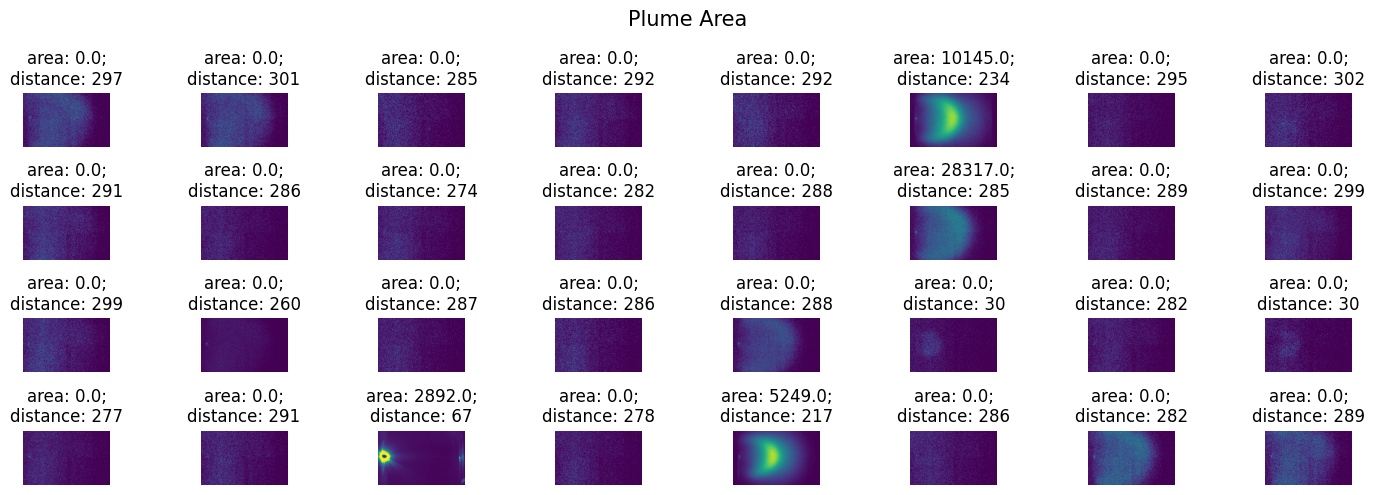

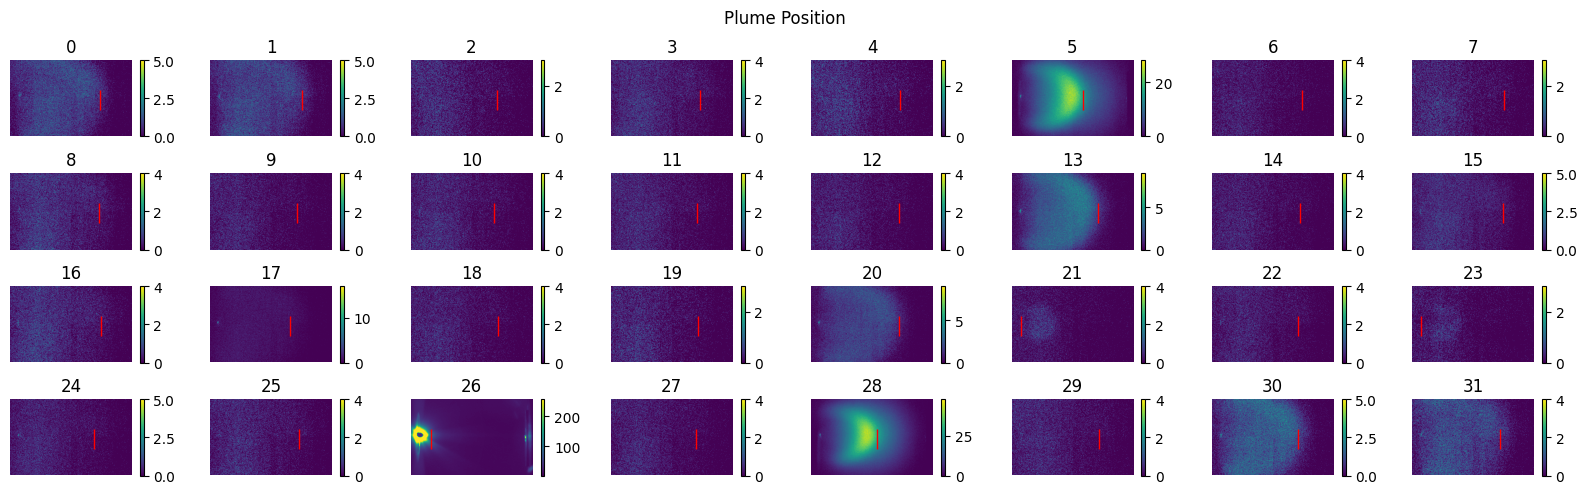

In [51]:
# exam the data
k = 32
with h5py.File('D:/pld_plumes/SRO_STO_Drexel/PlumeDataset_YG045_YG063.h5', 'r') as f:
    print(f.keys())
    print(f['images'].shape)
    
    length = f.attrs['total_images']
    index_imgs = random.choices(range(length), k=k)
    index_imgs.sort()
    
    images = f['images'][index_imgs]
    distance = f['Distance(flexible)'][index_imgs]
    area = f['Area(flexible)'][index_imgs]
    labels = [f'area: {area[index]};\ndistance: {distance[index]}' for index in range(len(index_imgs))]
    
show_images(images, img_per_row=8, img_height=1, labels=labels, title='Plume Area')
plt.tight_layout()
plt.show()

coords_YG063 = np.array([[18,45], [20,209], [363,39], [364,223]])
start_position = np.round(np.mean(coords_YG063[:2], axis=0)).astype(np.int32) # start position of plume  (x, y)
position_range = np.min(coords_YG063[:,0]), np.max(coords_YG063[:,0]) # x position range
# retrieve the position from distance and y
y = int(np.mean(coords_YG063[:,1]))
ys = np.ones_like(distance) * y
positions = np.stack([distance, ys], axis=-1)

V = VelocityCalculator(time_interval=500e-9, start_position=start_position, position_range=position_range, threshold='flexible')
V.visualize_plume_positions(images, positions, label_time=False, title='Plume Position')

In [88]:
files = glob.glob('D:/pld_plumes/SRO_STO_Drexel/YG0*.h5')
files_train = glob.glob('D:/pld_plumes/SRO_STO_Drexel/YG0*.h5')
files_train.remove('D:/pld_plumes/SRO_STO_Drexel\\YG056_YichenGuo_06282024.h5')
files_test = ['D:/pld_plumes/SRO_STO_Drexel\\YG056_YichenGuo_06282024.h5']
files_train, files_test

(['D:/pld_plumes/SRO_STO_Drexel\\YG045_YichenGuo_JulianGoddy_05092024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG046_YichenGuo_05162024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG047_YichenGuo_05172024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG048_YichenGuo_05302024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG049_YichenGuo_06032024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG050_YichenGuo_06052024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG051_YichenGuo_06122024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG052_YichenGuo_06142024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG053_YichenGuo_06172024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG054_YichenGuo_06252024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG055_YichenGuo_06262024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG057_YichenGuo_06282024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG058_YichenGuo_06292024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG059_YichenGuo_07012024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG060_YichenGuo_07032024.h5',
  'D:/pld_plumes/SRO_STO_Drexel\\YG061_Yich

In [ ]:
length = 0
for file in files:
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length+=len(plumes)
    print(file, len(plumes))
length

#### add analytical plume dynamics

In [7]:
selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
make_dataset(target_file, input_files=files_train, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
make_dataset(target_file, input_files=files_test, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

(374, 128, 250, 400) uint8 0 255 2812
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156
../../../datasets/SRO_STO_Drexel\YG046_YichenGuo_05162024.h5
125
../../../datasets/SRO_STO_Drexel\YG047_YichenGuo_05172024.h5
94
../../../datasets/SRO_STO_Drexel\YG051_YichenGuo_06122024.h5
189
../../../datasets/SRO_STO_Drexel\YG053_YichenGuo_06172024.h5
219
../../../datasets/SRO_STO_Drexel\YG057_YichenGuo_06282024.h5
282
../../../datasets/SRO_STO_Drexel\YG058_YichenGuo_06292024.h5
376
../../../datasets/SRO_STO_Drexel\YG059_YichenGuo_07012024.h5
314
../../../datasets/SRO_STO_Drexel\YG060_YichenGuo_07032024.h5
306
../../../datasets/SRO_STO_Drexel\YG061_YichenGuo_07042024.h5
377
../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374
(219, 128, 250, 400) uint8 0 255 219
../../../datasets/SRO_STO_Drexel\YG056_YichenGuo_06282024.h5
219


In [8]:
csv_train = ['../../../datasets/SRO_plume_metrics/YG045_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG046_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG047_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG051_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG053_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG057_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG058_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG059_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG060_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG061_metrics.csv',
             '../../../datasets/SRO_plume_metrics/YG062_metrics.csv']
csv_test = ['../../../datasets/SRO_plume_metrics/YG056_metrics.csv']



max_area_list, max_velocity_list = [], []
for csv_file in csv_train:
    df = pd.read_csv(csv_file)
    df_filtered = df[df['Threshold'] == '200']
    result_df = df_filtered.groupby('plume_index').agg({'Area': 'max', 'Velocity': 'max'}).reset_index()
    result_df.columns = ['plume_index', 'max_Area', 'max_Velocity']
    max_Area = result_df['max_Area'].values
    max_Velocity = result_df['max_Velocity'].values
    print(max_Area.shape, max_Velocity.shape)
    max_area_list.append(max_Area)
    max_velocity_list.append(max_Velocity)

max_area = np.concatenate(max_area_list)
max_velocity = np.concatenate(max_velocity_list)
print(max_area.shape, max_velocity.shape)

# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('max_area', data=max_area)
    f.create_dataset('max_velocity', data=max_velocity)


max_area_list, max_velocity_list = [], []
for csv_file in csv_test:
    df = pd.read_csv(csv_file)
    df_filtered = df[df['Threshold'] == '200']
    result_df = df_filtered.groupby('plume_index').agg({'Area': 'max', 'Velocity': 'max'}).reset_index()
    result_df.columns = ['plume_index', 'max_Area', 'max_Velocity']
    max_Area = result_df['max_Area'].values
    max_Velocity = result_df['max_Velocity'].values
    print(max_Area.shape, max_Velocity.shape)
    max_area_list.append(max_Area)
    max_velocity_list.append(max_Velocity)

max_area = np.concatenate(max_area_list)
max_velocity = np.concatenate(max_velocity_list)
print(max_area.shape, max_velocity.shape)

# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('max_area', data=max_area)
    f.create_dataset('max_velocity', data=max_velocity)

(156,) (156,)
(125,) (125,)
(94,) (94,)
(189,) (189,)
(219,) (219,)
(282,) (282,)
(376,) (376,)
(314,) (314,)
(306,) (306,)
(377,) (377,)
(374,) (374,)
(2812,) (2812,)
(219,) (219,)
(219,) (219,)


In [9]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

../../../datasets/MultiParams_2_36frames_analytical_train.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (2812, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (2812, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "growth_rate(angstrom_per_pulse)": shape (2812, 1), type "<f4">
   growth_rate(nm_per_min) <HDF5 dataset "growth_rate(nm_per_min)": shape (2812, 1), type "<f4">
   labels <HDF5 dataset "labels": shape (2812, 3), type "<f4">
   max_area <HDF5 dataset "max_area": shape (2812,), type "<f8">
   max_velocity <HDF5 dataset "max_velocity": shape (2812,), type "<f8">
   plumes <HDF5 dataset "plumes": shape (2812, 34, 250, 400), type "|u1">
../../../datasets/MultiParams_2_36frames_analytical_test.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (219, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape 

In [18]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'r') as f:
    max_area_train = np.array(f['max_area'])
    max_velocity_train = np.array(f['max_velocity'])
    labels_train = np.array(f['labels'])

labels_all = np.concatenate([labels_train, max_area_train.reshape(-1, 1), max_velocity_train.reshape(-1, 1)], axis=1)
print(labels_all.shape)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('labels_all', data=labels_all)

(2812, 5)


In [19]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'r') as f:
    max_area_test = np.array(f['max_area'])
    max_velocity_test = np.array(f['max_velocity'])
    labels_test = np.array(f['labels'])

labels_all = np.concatenate([labels_test, max_area_test.reshape(-1, 1), max_velocity_test.reshape(-1, 1)], axis=1)
print(labels_all.shape)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('labels_all', data=labels_all)

(219, 5)


In [20]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'r') as f:
    labels_all_train = np.array(f['labels_all'])
print(labels_all_train.shape)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'r') as f:
    labels_all_test = np.array(f['labels_all'])
print(labels_all_test.shape)

labels_all_all = np.concatenate([labels_all_train, labels_all_test])

(2812, 5)
(219, 5)


In [25]:
normalizer = EqualRangeNormalizer()
normalizer.fit(labels_all_all)
normalized_labels_all_all= normalizer.transform(labels_all_all)
normalized_labels_all_train = normalized_labels_all_all[:len(labels_all_train)]
normalized_labels_all_test = normalized_labels_all_all[len(labels_all_train):]
print(normalized_labels_all_train.shape, normalized_labels_all_test.shape)

Original labels stats:
Min: [5.00000000e+01 8.00000012e-01 1.89999994e-02 0.00000000e+00
 0.00000000e+00]
Max: [1.50000000e+02 2.04999995e+00 1.12000003e-01 3.10720000e+04
 2.08000000e+08]
Mean: [8.92362257e+01 1.51902886e+00 4.96022266e-02 1.47534256e+04
 1.12945563e+08]
Std: [2.95236394e+01 3.36006588e-01 2.19153421e-02 5.71617007e+03
 2.64495437e+07]

Normalized labels stats:
Min: [0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1.]
Mean: [0.39236226 0.5752231  0.32905619 0.47481416 0.54300751]
Std: [0.29523639 0.26880528 0.23564883 0.18396531 0.12716127]
(2812, 5) (219, 5)


In [26]:
# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels_all_train', data=normalized_labels_all_train)

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels_all_test', data=normalized_labels_all_test)

In [27]:
target_file = '../../../datasets/MultiParams_2_36frames_analytical_train.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

target_file = '../../../datasets/MultiParams_2_36frames_analytical_test.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys(): 
        print('  ', k, f[k])

../../../datasets/MultiParams_2_36frames_analytical_train.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (2812, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (2812, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "growth_rate(angstrom_per_pulse)": shape (2812, 1), type "<f4">
   growth_rate(nm_per_min) <HDF5 dataset "growth_rate(nm_per_min)": shape (2812, 1), type "<f4">
   labels <HDF5 dataset "labels": shape (2812, 3), type "<f4">
   labels_all <HDF5 dataset "labels_all": shape (2812, 5), type "<f8">
   max_area <HDF5 dataset "max_area": shape (2812,), type "<f8">
   max_velocity <HDF5 dataset "max_velocity": shape (2812,), type "<f8">
   normalized_labels_all_train <HDF5 dataset "normalized_labels_all_train": shape (2812, 5), type "<f8">
   plumes <HDF5 dataset "plumes": shape (2812, 34, 250, 400), type "|u1">
../../../datasets/MultiParams_2_36frames_analytical_test.h5
   Fluenc

#### multi params dataset

In [6]:
selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
make_dataset(target_file, input_files=files_train, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

selected_frame = (2, 36)
target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
make_dataset(target_file, input_files=files_test, df_condition=df_condition, selected_frame=selected_frame, growth_name_dict=growth_name_dict)

(374, 128, 250, 400) uint8 0 255 2812
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156
../../../datasets/SRO_STO_Drexel\YG046_YichenGuo_05162024.h5
125
../../../datasets/SRO_STO_Drexel\YG047_YichenGuo_05172024.h5
94
../../../datasets/SRO_STO_Drexel\YG051_YichenGuo_06122024.h5
189
../../../datasets/SRO_STO_Drexel\YG053_YichenGuo_06172024.h5
219
../../../datasets/SRO_STO_Drexel\YG057_YichenGuo_06282024.h5
282
../../../datasets/SRO_STO_Drexel\YG058_YichenGuo_06292024.h5
376
../../../datasets/SRO_STO_Drexel\YG059_YichenGuo_07012024.h5
314
../../../datasets/SRO_STO_Drexel\YG060_YichenGuo_07032024.h5
306
../../../datasets/SRO_STO_Drexel\YG061_YichenGuo_07042024.h5
377
../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374
(219, 128, 250, 400) uint8 0 255 219
../../../datasets/SRO_STO_Drexel\YG056_YichenGuo_06282024.h5
219


In [18]:
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
with h5py.File(target_file, 'r') as f:
    labels_train = np.array(f['labels'])
print(labels_train.shape)

target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
with h5py.File(target_file, 'r') as f:
    labels_test = np.array(f['labels'])
print(labels_test.shape)

(2812, 3)
(219, 3)


In [19]:
labels = np.concatenate((labels_train, labels_test))

In [20]:
# Create and fit the normalizer
normalizer = EqualRangeNormalizer()
normalizer.fit(labels)

# Normalize the labels
normalized_labels = normalizer.transform(labels)

labels_train = normalized_labels[:len(labels_train)]
labels_test = normalized_labels[len(labels_train):]

Original labels stats:
Min: [5.0e+01 8.0e-01 1.9e-02]
Max: [1.50e+02 2.05e+00 1.12e-01]
Mean: [8.9236229e+01 1.5190604e+00 4.9602795e-02]
Std: [2.9523737e+01 3.3600909e-01 2.1915358e-02]

Normalized labels stats:
Min: [0. 0. 0.]
Max: [1. 1. 1.]
Mean: [0.39236227 0.57522595 0.32905406]
Std: [0.29523355 0.2688057  0.23564732]


In [21]:
# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels', data=labels_train)

# normalize the labels and create another dataset for it
target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
with h5py.File(target_file, 'a') as f:
    f.create_dataset('normalized_labels', data=labels_test)

In [24]:
target_file = '../../../datasets/MultiParams_2_36frames_train.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

target_file = '../../../datasets/MultiParams_2_36frames_test.h5'
print(target_file)
with h5py.File(target_file, 'r') as f:
    for k in f.keys():
        print('  ', k, f[k])

../../../datasets/MultiParams_2_36frames_train.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (2812, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (2812, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "growth_rate(angstrom_per_pulse)": shape (2812, 1), type "<f4">
   growth_rate(nm_per_min) <HDF5 dataset "growth_rate(nm_per_min)": shape (2812, 1), type "<f4">
   labels <HDF5 dataset "labels": shape (2812, 3), type "<f4">
   normalized_labels <HDF5 dataset "normalized_labels": shape (2812, 3), type "<f4">
   plumes <HDF5 dataset "plumes": shape (2812, 34, 250, 400), type "|u1">
../../../datasets/MultiParams_2_36frames_test.h5
   Fluence (J <HDF5 group "/Fluence (J" (1 members)>
   Pressure (mTorr) <HDF5 dataset "Pressure (mTorr)": shape (219, 1), type "<f4">
   growth_name <HDF5 dataset "growth_name": shape (219, 1), type "|u1">
   growth_rate(angstrom_per_pulse) <HDF5 dataset "gro

## multiple parameters before normalize

In [11]:
selected_frame = (2, 36)

length = 0
for file in files_train:
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/MultiParams_2_36frames_train.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 34, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Pressure (mTorr)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Fluence (J/cm2)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('labels', shape=(length, 3), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_train):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:, selected_frame[0]:selected_frame[1]]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['Pressure (mTorr)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0]
        f['Fluence (J/cm2)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0]
        
        labels = np.array([df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]])
        f['labels'][index:index+len(plumes)] = labels
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

length = 0
for file in files_test:
    print(file)
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
    print(len(plumes))
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/MultiParams_2_36frames_test.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 34, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Pressure (mTorr)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('Fluence (J/cm2)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('labels', shape=(length, 3), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_train):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:, selected_frame[0]:selected_frame[1]]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['Pressure (mTorr)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0]
        f['Fluence (J/cm2)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0]
        
        labels = np.array([df_condition[df_condition['Growth'] == growth]['Pressure (mTorr)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['Fluence (J/cm2)'].values[0],
                           df_condition[df_condition['Growth'] == growth]['growth_rate(angstrom_per_pulse)'].values[0]])
        f['labels'][index:index+len(plumes)] = labels
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

(374, 128, 250, 400) uint8 0 255 2812
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156


KeyError: 'growth_rate (Å/pulse)'

In [7]:
length = 0
for file in files_train:
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/growth_rate_regression_ds_2_26frames_train.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 24, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_train):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:,2:26]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

(377, 128, 250, 400) uint8 0 255 2657
../../../datasets/SRO_STO_Drexel\YG045_YichenGuo_JulianGoddy_05092024.h5
156
../../../datasets/SRO_STO_Drexel\YG046_YichenGuo_05162024.h5
125
../../../datasets/SRO_STO_Drexel\YG047_YichenGuo_05172024.h5
94
../../../datasets/SRO_STO_Drexel\YG051_YichenGuo_06122024.h5
189
../../../datasets/SRO_STO_Drexel\YG053_YichenGuo_06172024.h5
219
../../../datasets/SRO_STO_Drexel\YG056_YichenGuo_06282024.h5
219
../../../datasets/SRO_STO_Drexel\YG057_YichenGuo_06282024.h5
282
../../../datasets/SRO_STO_Drexel\YG058_YichenGuo_06292024.h5
376
../../../datasets/SRO_STO_Drexel\YG059_YichenGuo_07012024.h5
314
../../../datasets/SRO_STO_Drexel\YG060_YichenGuo_07032024.h5
306
../../../datasets/SRO_STO_Drexel\YG061_YichenGuo_07042024.h5
377


In [8]:
length = 0
for file in files_test:
    print(file)
    plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
    keys = plume_ds.dataset_names()
    plumes = plume_ds.load_plumes('1-SrRuO3')
    length += len(plumes)
    print(len(plumes))
print(plumes.shape, plumes.dtype, np.min(plumes), np.max(plumes), length)

with h5py.File('../../../datasets/growth_rate_regression_ds_2_26frames_test.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 24, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files_test):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')[:,2:26]
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)

../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374
(374, 128, 250, 400) uint8 0 255 374
../../../datasets/SRO_STO_Drexel\YG062_YichenGuo_07052024.h5
374


#### full range

In [ ]:
with h5py.File('../../../datasets/growth_rate_regression_ds.h5', 'w') as f:
    f.create_dataset('plumes', shape=(length, 128, 250, 400), dtype=np.uint8)
    f.create_dataset('growth_rate(angstrom_per_pulse)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_rate(nm_per_min)', shape=(length, 1), dtype=np.float32)
    f.create_dataset('growth_name', shape=(length, 1), dtype=np.uint8)

    index = 0
    for growth, file in zip(growth_names, files):
        print(file)
        plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
        plumes = plume_ds.load_plumes('1-SrRuO3')
        f['plumes'][index:index+len(plumes)] = plumes
        print(len(plumes))

        f['growth_rate(angstrom_per_pulse)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (Å/pulse)'].values[0]
        f['growth_rate(nm_per_min)'][index:index+len(plumes)] = df_condition[df_condition['Growth'] == growth]['Growth rate (nm/min)'].values[0]
        f['growth_name'][index:index+len(plumes)] = growth_name_dict[growth]

        index += len(plumes)